In [3]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.4 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


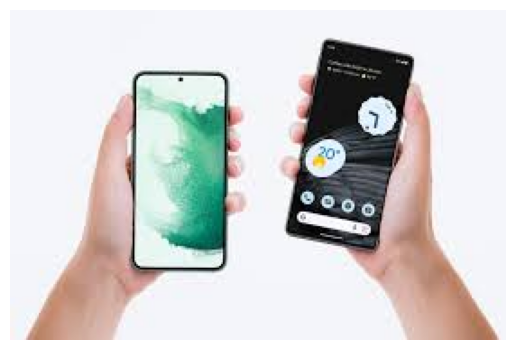


image 1/1 /content/drive/MyDrive/load.jpg: 448x640 1 person, 2 cell phones, 3062.8ms
Speed: 4.1ms preprocess, 3062.8ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Detectado: cell phone
Categoría final: cell phone


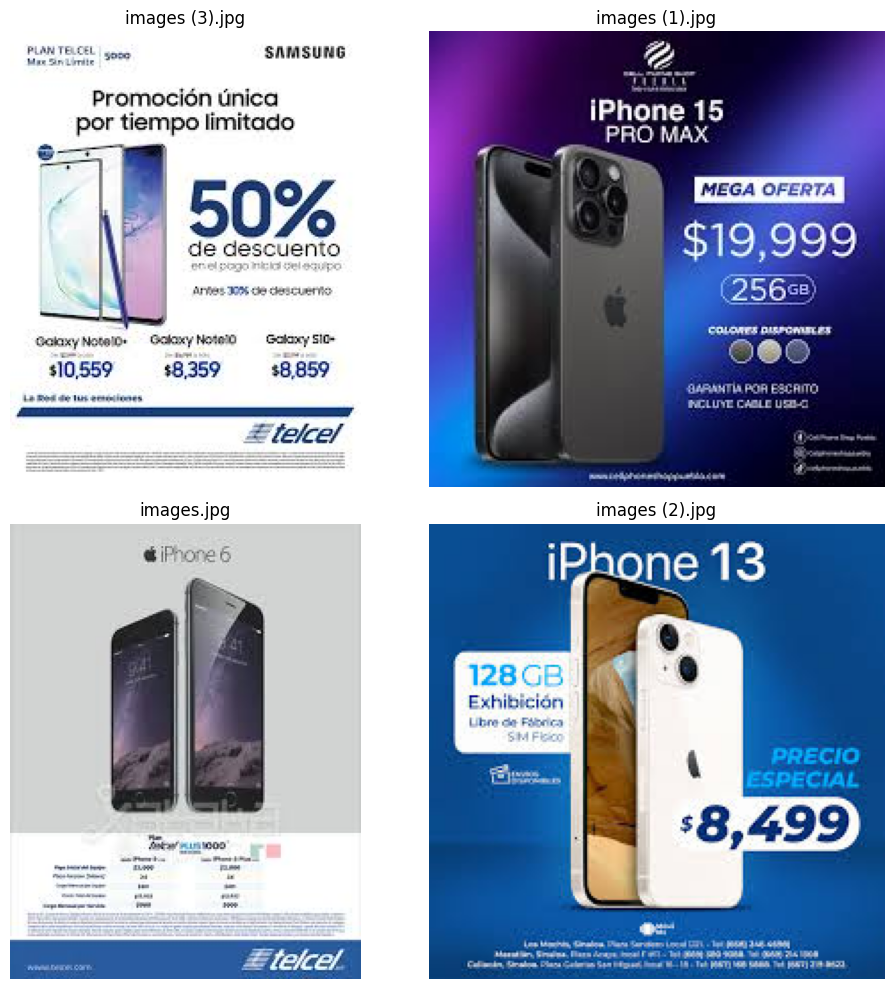

In [8]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Cargar YOLOv8
model = YOLO("yolov8x.pt")

def clasificar_bebida(imagen_path):
    results = model.predict(imagen_path)
    nombres = model.model.names

    categorias_validas = ["laptop", "mouse", "keyboard", "cell phone"]

    for r in results:
        for box in r.boxes:
            clase = nombres[int(box.cls)]
            if clase in categorias_validas:
                print("Detectado:", clase)
                return clase

    print("No se encontró categoría válida.")
    return None


def mostrar_imagen(ruta):
    img = cv2.imread(ruta)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.show()


# --- MONTAR GOOGLE DRIVE ---
from google.colab import drive
drive.mount('/content/drive')

# Imagen a analizar
ruta = "/content/drive/MyDrive/load.jpg"

mostrar_imagen(ruta)
categoria = clasificar_bebida(ruta)
print("Categoría final:", categoria)

# ======== RECOMENDACIONES SEGÚN LA CATEGORÍA DETECTADA ==========

# Carpeta base donde están las subcarpetas de cada clase
carpeta_base = "/content/drive/MyDrive/recomendaciones"


def mostrar_recomendaciones(categoria):
    # Carpeta de esa categoría específica
    carpeta_categoria = os.path.join(carpeta_base, categoria)

    if not os.path.exists(carpeta_categoria):
        print("No existe carpeta para la categoría:", categoria)
        return

    # Filtrar solo imágenes
    imagenes = [
        img for img in os.listdir(carpeta_categoria)
        if img.lower().endswith((".jpg", ".jpeg", ".png"))
    ]

    if len(imagenes) < 4:
        print("La carpeta no tiene 4 imágenes:", carpeta_categoria)
        return

    # Elegir 4 aleatorias
    seleccionadas = random.sample(imagenes, 4)

    # Mostrar en cuadrícula
    plt.figure(figsize=(10, 10))
    for i, img_name in enumerate(seleccionadas):
        img_path = os.path.join(carpeta_categoria, img_name)
        img = Image.open(img_path)

        plt.subplot(2, 2, i + 1)
        plt.imshow(img)
        plt.title(img_name)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


# Si la categoría es válida, mostrar recomendaciones
if categoria in ["laptop", "mouse", "keyboard", "cell phone"]:
    mostrar_recomendaciones(categoria)

